In [1]:
# import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns               # to make it prettier (and add other graphing functions)
%matplotlib inline
path = 'Data/normal_questions.csv'
# read the csv file and convert to a pandas DataFrame, store the DataFrame in 
# variable complaints
df = pd.read_csv(path)

In [2]:
df.columns #reminding myself what i titled the columns

Index(['Timestamp', 'skin_texture', 'fight_winner', 'music', 'allergies',
       'vocabulary', 'sculpting'],
      dtype='object')

Text(0, 0.5, 'Number of Votes')

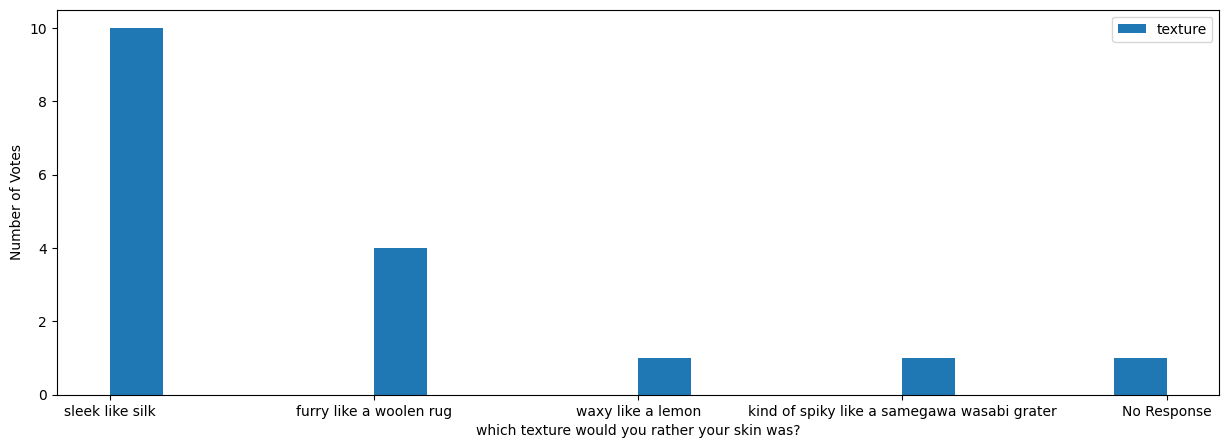

In [24]:
# plotting which texture would you rather your skin was?
df_skin_texture = df['skin_texture']
plt.figure(figsize=(15,5))
plt.hist(df_skin_texture, bins=20, label='texture')

plt.legend()
plt.xlabel("which texture would you rather your skin was?")
plt.ylabel("Number of Votes")

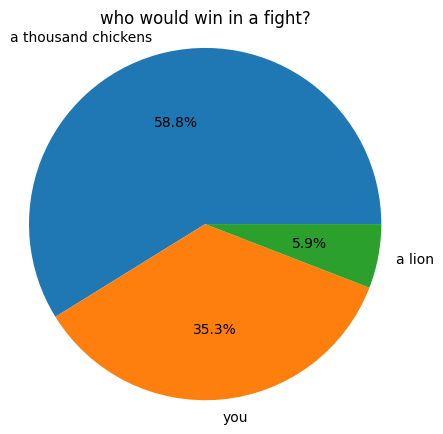

In [30]:
# plotting 'who would win in a fight?'
df_fight_winner = df['fight_winner']

plt.figure(figsize=(5,5))  # Makes the pie chart a good size

# Count the frequency of each unique value
winner_counts = df_fight_winner.value_counts()

plt.pie(winner_counts.values, 
        labels=winner_counts.index, 
        autopct='%1.1f%%')  # Shows the percentage on each slice


plt.title("who would win in a fight?")
plt.axis('equal')  # Makes the pie circular (instead of oval)
plt.show()

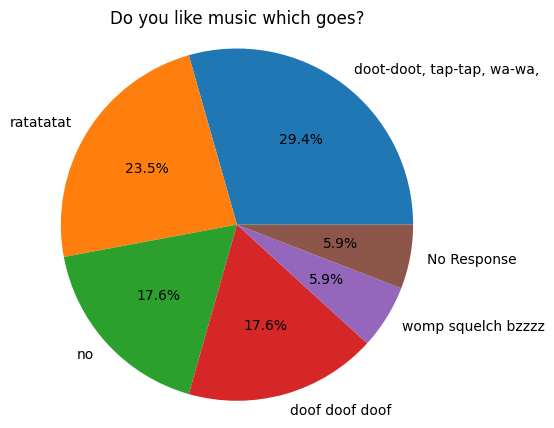

In [31]:
# plotting 'Do you like music which goes?'
df_music = df['music']

plt.figure(figsize=(5,5))  # Makes the pie chart a good size

# Count the frequency of each unique value
music_counts = df_music.value_counts()

plt.pie(music_counts.values, 
        labels=music_counts.index, 
        autopct='%1.1f%%')  # Shows the percentage on each slice


plt.title("Do you like music which goes?")
plt.axis('equal')  # Makes the pie circular (instead of oval)
plt.show()

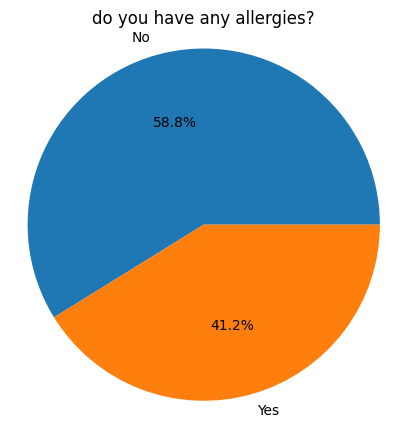

In [32]:
# plotting 'do you have any allergies?'
df_allergies = df['allergies']

plt.figure(figsize=(5,5))  # Makes the pie chart a good size

# Count the frequency of each unique value
allergy_counts = df_allergies.value_counts()

plt.pie(allergy_counts.values, 
        labels=allergy_counts.index, 
        autopct='%1.1f%%')  # Shows the percentage on each slice


plt.title("do you have any allergies?")
plt.axis('equal')  # Makes the pie circular (instead of oval)
plt.show()

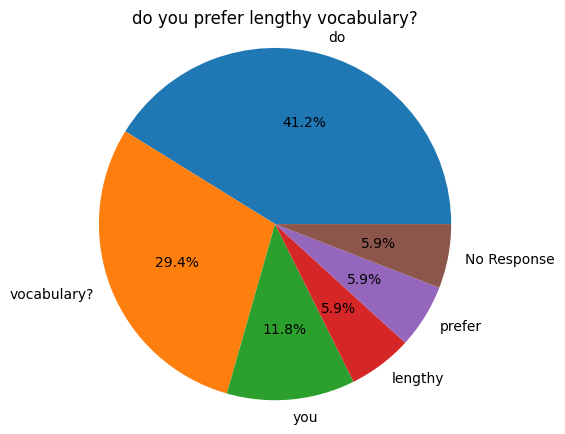

In [33]:
# plotting 'do you prefer lengthy vocabulary?'
df_vocabulary = df['vocabulary']

plt.figure(figsize=(5,5))  # Makes the pie chart a good size

# Count the frequency of each unique value
vocabulary_counts = df_vocabulary.value_counts()

plt.pie(vocabulary_counts.values, 
        labels=vocabulary_counts.index, 
        autopct='%1.1f%%')  # Shows the percentage on each slice


plt.title("do you prefer lengthy vocabulary?")
plt.axis('equal')  # Makes the pie circular (instead of oval)
plt.show()

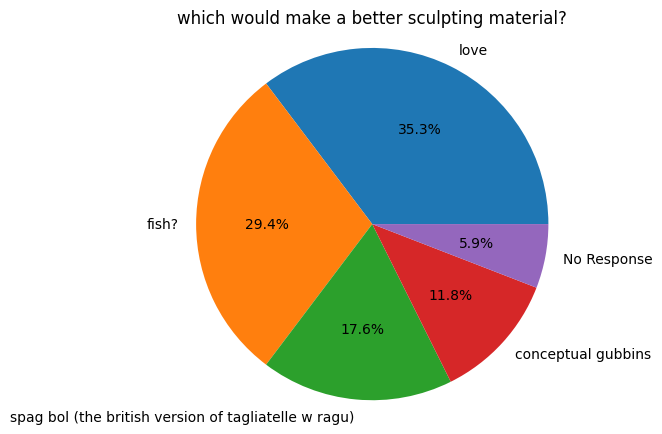

In [34]:
# plotting 'which would make a better sculpting material?'
df_sculpting = df['sculpting']

plt.figure(figsize=(5,5))  # Makes the pie chart a good size

# Count the frequency of each unique value
sculpting_counts = df_sculpting.value_counts()

plt.pie(sculpting_counts.values, 
        labels=sculpting_counts.index, 
        autopct='%1.1f%%')  # Shows the percentage on each slice


plt.title("which would make a better sculpting material?")
plt.axis('equal')  # Makes the pie circular (instead of oval)
plt.show()

Now I want to find out if there's any correlation between any of the answer within the entire questionaire

In [3]:
# Remove the Timestamp column and handle missing values
df = df.drop('Timestamp', axis=1)
df = df.fillna('No Response')

# Convert categorical variables to boolean
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr() # uses the pearson chi squared measure for correlation (Cramers V would be normalised better but was a bit complicated)

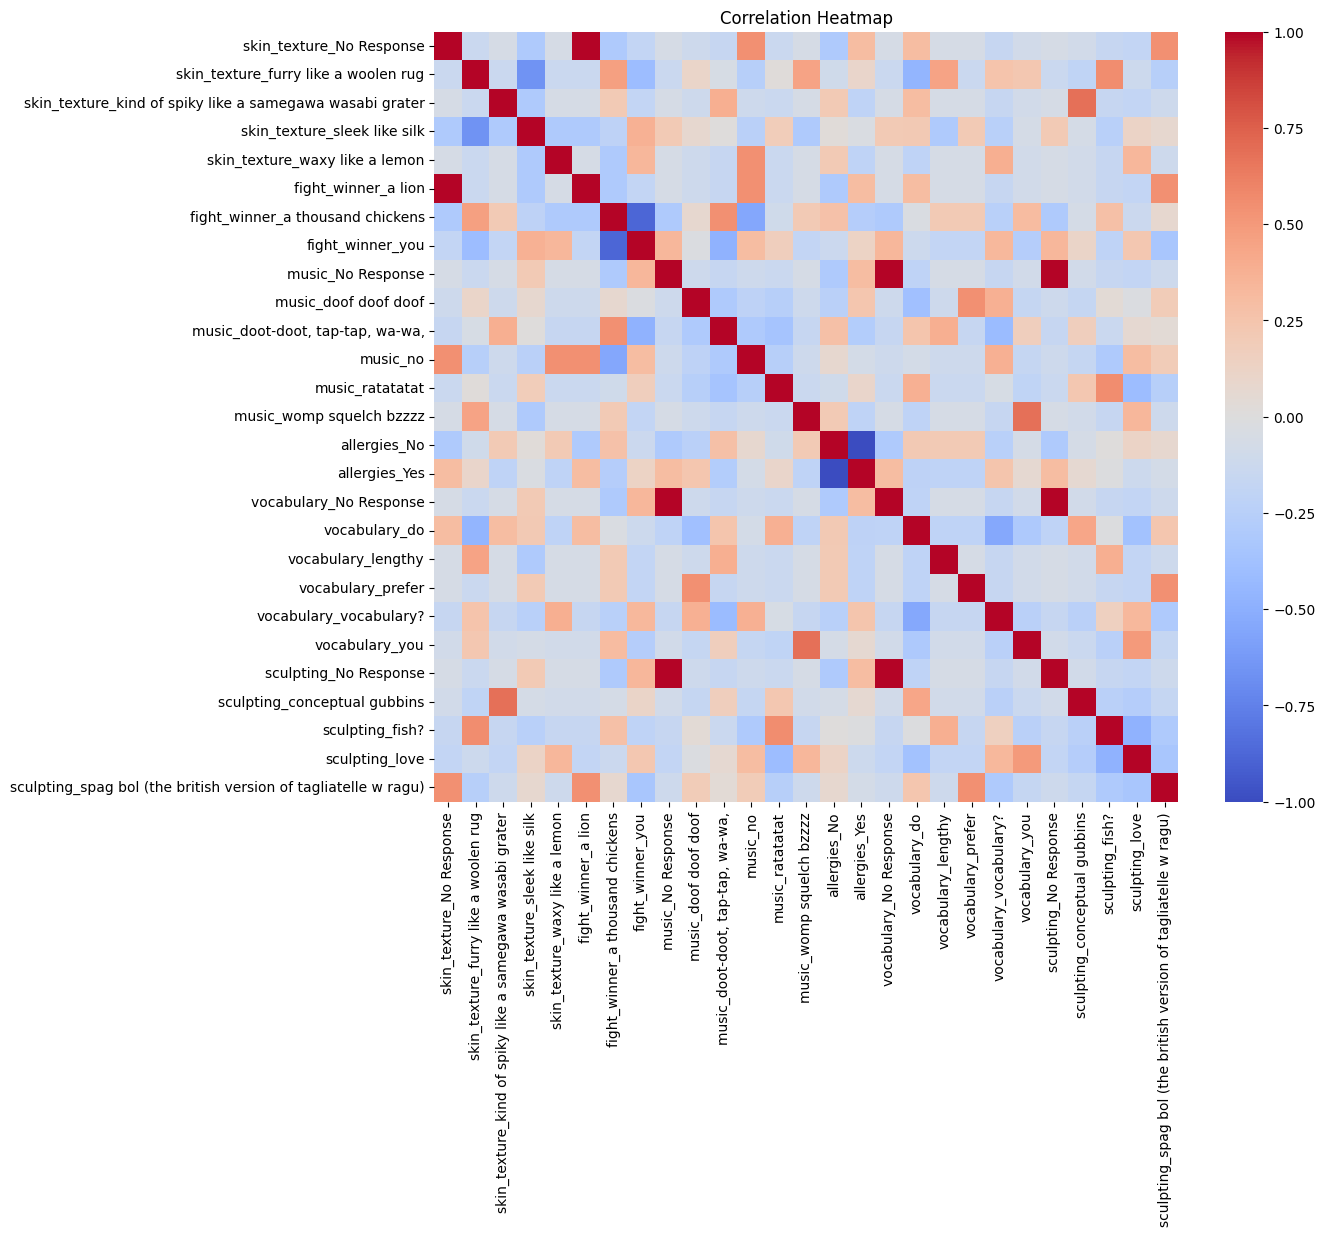

In [16]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

This doesn't take into account the various sample sizes, so I wanted to find a way to get into more detail. As well as the individual correlations between answers I wanted to look at which questions were most closely associated

In [5]:
# Get the list of questions
questions = df.columns

# Function to calculate an association score
def association_score(x, y):
    crosstab = pd.crosstab(x, y)
    return (crosstab.max(axis=1).sum() - len(crosstab)) / (len(x) - len(crosstab))

# Create a list to store all association values
associations = []

''' #created this while testing the function to check if I understood what's going on...
test_df = {
    'Name': ['Alice', 'David', 'Alice', 'David'],
    'Age': [25, 30, 25, 28],
    'City': ['New York', 'Tokyo', 'Paris', 'Tokyo']
}
'''
    
# Calculate associations for all pairs of questions
for i in range(len(questions)):  # cycle through for the length of each question
    for j in range(i+1, len(questions)):  # Start from i+1 to avoid self-pairs
        score = association_score(df[questions[i]], df[questions[j]])
        associations.append({
            'Question 1': questions[i],
            'Question 2': questions[j],
            'Association Score': score
        })


# Convert to DataFrame and sort by association score
results_df = pd.DataFrame(associations)
# association_score(test_df['Name'],test_df['City'])
results_df

,Question 1,Question 2,Association Score
0,skin_texture,fight_winner,0.583333
1,skin_texture,music,0.166667
2,skin_texture,allergies,0.500000
3,skin_texture,vocabulary,0.416667
4,skin_texture,sculpting,0.416667
5,fight_winner,music,0.357143
6,fight_winner,allergies,0.571429
7,fight_winner,vocabulary,0.357143
8,fight_winner,sculpting,0.357143
9,music,allergies,0.545455


as skin texture + fight winner are have the highest correlation, i want to plot them together. 

In [7]:
# creating a dataframe with just these two columns for simplicity
df_texture_fight = df.loc[:, ['skin_texture', 'fight_winner']].copy()
# converting fight winner to numbers so i can scatterplot
df_texture_fight['fight_winner'] = df_texture_fight['fight_winner'].replace({
    'you': 0,
    'a thousand chickens': 1,
    'a lion': 2
})

df_texture_fight

C:\Users\Fergus Laidlaw\AppData\Local\Temp\ipykernel_34020\1294322775.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_texture_fight['fight_winner'] = df_texture_fight['fight_winner'].replace({


,skin_texture,fight_winner
0,sleek like silk,1
1,sleek like silk,0
2,furry like a woolen rug,1
3,furry like a woolen rug,1
4,sleek like silk,0
5,sleek like silk,0
6,furry like a woolen rug,1
7,waxy like a lemon,0
8,kind of spiky like a samegawa wasabi grater,1
9,sleek like silk,0


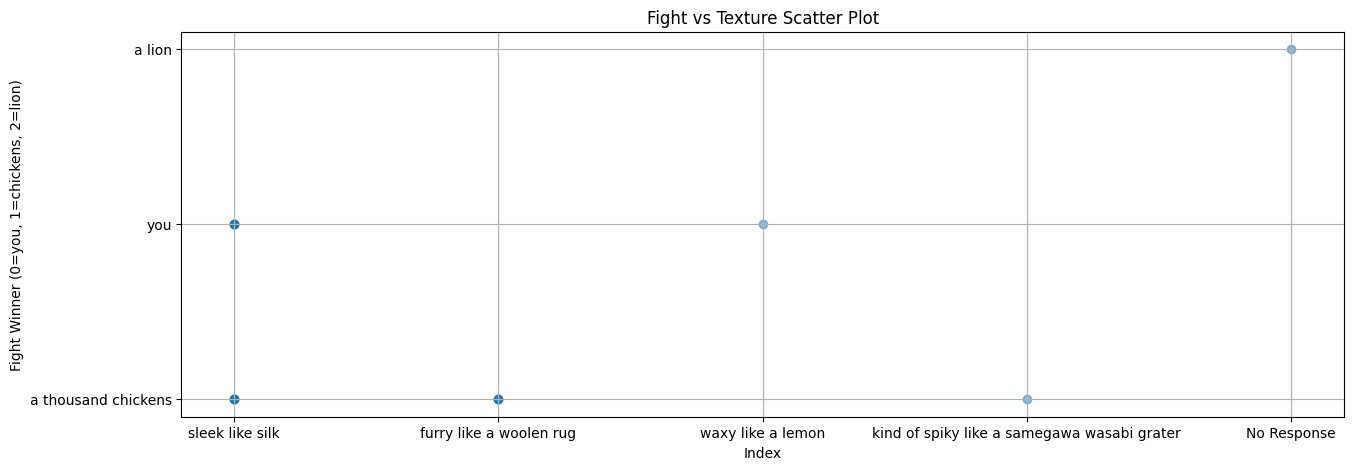

In [13]:
plt.figure(figsize=(15, 5))  # sets the size of the plot
plt.scatter(df['skin_texture'], df['fight_winner'],alpha=0.5) #using alpha to see the density

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Fight Winner (0=you, 1=chickens, 2=lion)')
plt.title('Fight vs Texture Scatter Plot')

# Optional: add grid
plt.grid(True)

plt.show()

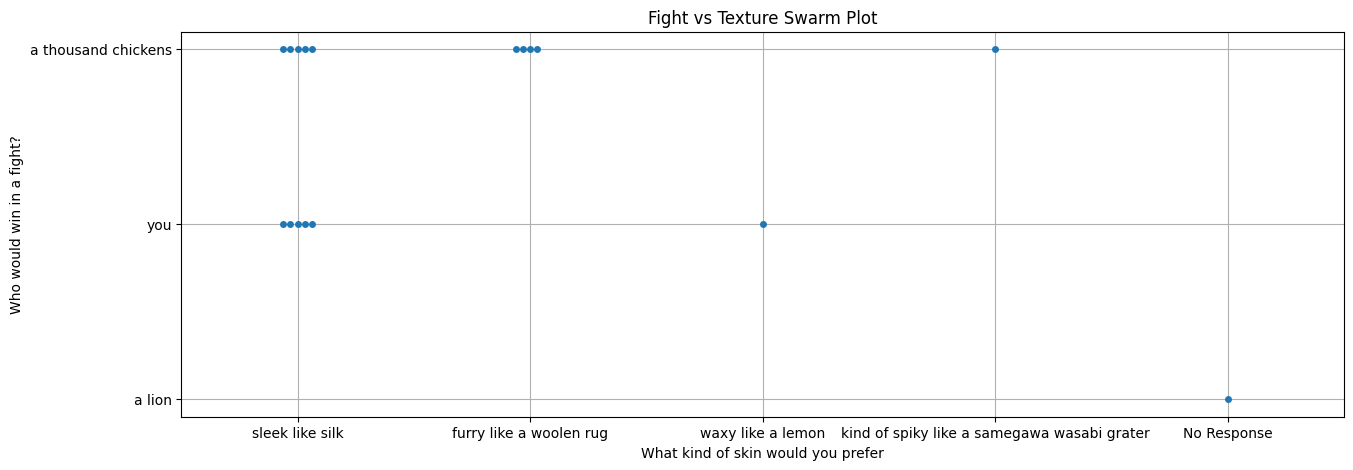

In [17]:
plt.figure(figsize=(15, 5))
sns.swarmplot(x='skin_texture', y='fight_winner', data=df)
plt.xlabel('What kind of skin would you prefer?')
plt.ylabel('Who would win in a fight?')
plt.title('Fight vs Texture Swarm Plot')
plt.grid(True)
plt.show()

In [9]:
#testing git commit with a comment